In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
temp = pd.read_csv("new_weather.csv", encoding='utf-8')

In [3]:
temp.shape

(1826, 10)

In [4]:
temp["temp"]=temp[["BARRINGTON 3SW","CHICAGO BOTANIC GARDEN","CHICAGO MIDWAY AP","CHICAGO MIDWAY AP 3SW", 
                     "CHICAGO NORTHERLY ISLAND", "CHICAGO OHARE INTL AP", "CHICAGO PALWAUKEE AP"]].mean(axis=1)

In [5]:
temp.head(1)

,Date,BARRINGTON 3SW,CHICAGO BOTANIC GARDEN,CHICAGO MIDWAY AP,CHICAGO MIDWAY AP 3SW,CHICAGO NORTHERLY ISLAND,CHICAGO OHARE INTL AP,CHICAGO PALWAUKEE AP,LITTLE RED SCHOOL HOUSE,PARK FOREST,temp
0,1/1/2013,19.5,23,20,19.5,20.5,18.0,17.5,M,27,18.75


In [6]:
new_df = temp[["Date","temp"]]
new_df.head(1)

,Date,temp
0,1/1/2013,18.75


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
Date    1826 non-null object
temp    1826 non-null float64
dtypes: float64(1), object(1)
memory usage: 28.6+ KB


In [8]:
new_df["time"]=pd.to_datetime(new_df["Date"],format="%m/%d/%Y")

C:\Users\lovel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
del new_df["Date"]

In [10]:
new_df.set_index("time", inplace=True)
new_df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='time', length=1826, freq=None)

In [11]:
new_temp=new_df.resample("D").mean()
new_temp.head(5)

,temp
time,
2013-01-01,18.75
2013-01-02,20.25
2013-01-03,23.75
2013-01-04,24.75
2013-01-05,29.50


In [12]:
crime = pd.read_csv("Crimes_2013_to_2017.csv", encoding='utf-8')

In [13]:
crime.head(1)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,1,11162428,JA529032,2017-11-28 21:43:00,026XX S CALIFORNIA BLVD,5131,OTHER OFFENSE,VIOLENT OFFENDER: ANNUAL REGISTRATION,JAIL / LOCK-UP FACILITY,True,...,12.0,30.0,26,1158280.0,1886310.0,2017,02/11/2018 03:54:58 PM,41.843778,-87.694638,"(41.843778126, -87.694637678)"


In [14]:
new_crime = crime[["Date", "Primary Type"]]

In [15]:
new_crime.head(1)

,Date,Primary Type
0,2017-11-28 21:43:00,OTHER OFFENSE


In [16]:
new_crime["time"] = pd.to_datetime(new_crime["Date"], format="%Y-%m-%d %H:%M:%S")
new_crime.head(1)

C:\Users\lovel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Primary Type,time
0,2017-11-28 21:43:00,OTHER OFFENSE,2017-11-28 21:43:00


In [17]:
new_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381201 entries, 0 to 1381200
Data columns (total 3 columns):
Date            1381201 non-null object
Primary Type    1381201 non-null object
time            1381201 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 31.6+ MB


In [18]:
del new_crime["Date"]
new_crime.head(1)

,Primary Type,time
0,OTHER OFFENSE,2017-11-28 21:43:00


In [19]:
new_crime.set_index("time", inplace=True)
new_crime.index

DatetimeIndex(['2017-11-28 21:43:00', '2017-12-11 19:15:00',
               '2017-10-08 03:00:00', '2017-03-28 14:00:00',
               '2017-09-09 20:17:00', '2017-11-23 15:14:00',
               '2017-08-26 10:00:00', '2013-02-10 00:00:00',
               '2015-01-01 00:01:00', '2017-01-01 00:01:00',
               ...
               '2017-12-24 20:30:00', '2017-12-24 15:45:00',
               '2017-12-25 00:16:00', '2017-12-25 15:45:00',
               '2017-12-26 16:10:00', '2017-12-25 10:29:00',
               '2017-12-25 18:05:00', '2017-12-25 12:15:00',
               '2017-12-25 15:35:00', '2017-12-30 01:00:00'],
              dtype='datetime64[ns]', name='time', length=1381201, freq=None)

In [20]:
new_crime.index

DatetimeIndex(['2017-11-28 21:43:00', '2017-12-11 19:15:00',
               '2017-10-08 03:00:00', '2017-03-28 14:00:00',
               '2017-09-09 20:17:00', '2017-11-23 15:14:00',
               '2017-08-26 10:00:00', '2013-02-10 00:00:00',
               '2015-01-01 00:01:00', '2017-01-01 00:01:00',
               ...
               '2017-12-24 20:30:00', '2017-12-24 15:45:00',
               '2017-12-25 00:16:00', '2017-12-25 15:45:00',
               '2017-12-26 16:10:00', '2017-12-25 10:29:00',
               '2017-12-25 18:05:00', '2017-12-25 12:15:00',
               '2017-12-25 15:35:00', '2017-12-30 01:00:00'],
              dtype='datetime64[ns]', name='time', length=1381201, freq=None)

In [21]:
daily_crime=new_crime.resample("D").count()

In [22]:
daily_crime.head()

,Primary Type
time,
2013-01-01,1347
2013-01-02,748
2013-01-03,771
2013-01-04,866
2013-01-05,788


In [23]:
df = pd.concat([new_temp, daily_crime], axis=1)
df.head()

,temp,Primary Type
time,,
2013-01-01,18.75,1347
2013-01-02,20.25,748
2013-01-03,23.75,771
2013-01-04,24.75,866
2013-01-05,29.50,788


In [48]:
df = df.rename(columns={"temp": "temperature", "Primary Type": "Crime Count"})
df.head()

,temperature,Crime Count
time,,
2013-01-01,18.75,1347
2013-01-02,20.25,748
2013-01-03,23.75,771
2013-01-04,24.75,866
2013-01-05,29.50,788


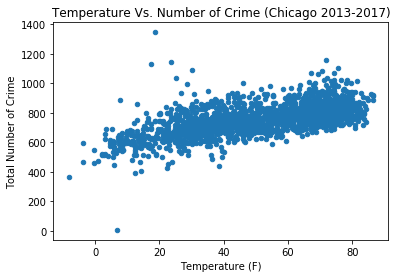

In [49]:
ax = df.plot.scatter(x="temperature", y="Crime Count")
ax.set_xlabel("Temperature (F)")
ax.set_ylabel("Total Number of Crime")
ax.set_title("Temperature Vs. Number of Crime (Chicago 2013-2017)")
plt.savefig("Temperature Vs. Number of Crime.png")
plt.show()

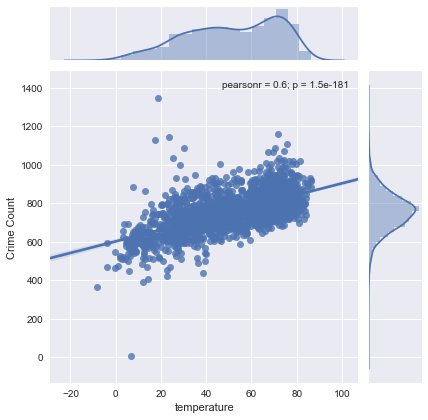

In [59]:
px = sns.jointplot(x="temperature", y="Crime Count", data=df, kind="reg")
plt.savefig("Correlation between Temprature and Crime Rate.png")
plt.show()

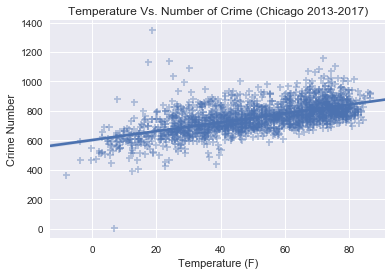

In [56]:
sns.set(color_codes=True)
ax = sns.regplot(x="temperature", y="Crime Count", data=df, scatter_kws={'alpha':0.4}, marker ="+")
ax.set(xlabel='Temperature (F)', ylabel='Crime Number')
ax.set_title("Temperature Vs. Number of Crime (Chicago 2013-2017)")
plt.savefig("Temperature Vs.Crime.png")
plt.show()

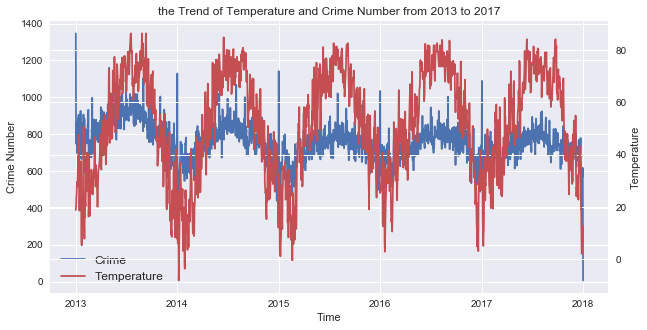

In [60]:
fig, ax1 = plt.subplots(figsize=(10,5))
lns1 = ax1.plot(df["Crime Count"], 'b-', label="Crime")
#ax1.set_xlim(pd.Timestamp('2013-01-01'), pd.Timestamp('2014-08-15'))
ax2 = ax1.twinx()
lns2 = ax2.plot(df["temperature"], 'r-', label="Temperature")
ax1.set(xlabel='Time', ylabel='Crime Number')
ax2.set(ylabel="Temperature")
ax1.set_title("the Trend of Temperature and Crime Number from 2013 to 2017")

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=3, fontsize=12)

plt.savefig("the Trend of Temperature and Crime Number from 2013 to 2017.png")
plt.show()

In [61]:
new_crime["no"] = 1

C:\Users\lovel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
new_crime.head(5)

,Primary Type,no
time,,
2017-11-28 21:43:00,OTHER OFFENSE,1
2017-12-11 19:15:00,ROBBERY,1
2017-10-08 03:00:00,CRIM SEXUAL ASSAULT,1
2017-03-28 14:00:00,BURGLARY,1
2017-09-09 20:17:00,THEFT,1


In [63]:
new_crime.groupby("Primary Type")["no"].sum().sort_values(ascending=False).head(5)

Primary Type
THEFT              316180
BATTERY            251733
CRIMINAL DAMAGE    147322
NARCOTICS          111934
ASSAULT             89913
Name: no, dtype: int64

In [64]:
crime_list = ["THEFT", "BATTERY", "CRIMINAL DAMAGE","NARCOTICS","ASSAULT"]

In [65]:
del new_crime["no"]

In [66]:
new_five = new_temp.copy()
for i in crime_list:
    new=new_crime[new_crime["Primary Type"]==i].resample("D").count()
    new.columns=[i]
    new_five = pd.concat([new_five, new], axis=1)


In [67]:
new_five.head()

,temp,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,ASSAULT
time,,,,,,
2013-01-01,18.75,253,283,118.0,60.0,39.0
2013-01-02,20.25,183,92,80.0,87.0,39.0
2013-01-03,23.75,144,111,69.0,105.0,45.0
2013-01-04,24.75,201,120,80.0,109.0,35.0
2013-01-05,29.50,160,118,85.0,92.0,43.0


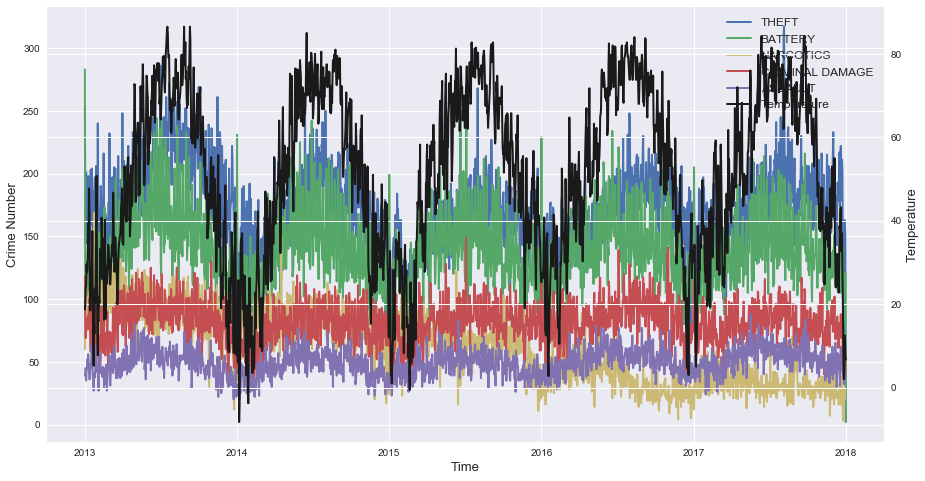

In [68]:
fig, ax1 = plt.subplots(figsize=(15,8))
lns1 = ax1.plot(new_five["THEFT"], 'b-', label="THEFT", linewidth=2)
lns2 = ax1.plot(new_five["BATTERY"], 'g-', label="BATTERY", linewidth=2)
lns3 = ax1.plot(new_five["NARCOTICS"], 'y-', label="NARCOTICS", linewidth=2)
lns4 = ax1.plot(new_five["CRIMINAL DAMAGE"], 'r-', label="CRIMINAL DAMAGE", linewidth=2)
lns5 = ax1.plot(new_five["ASSAULT"], 'm-', label="ASSAULT", linewidth=2)
ax2 = ax1.twinx()
lns6 = ax2.plot(new_five["temp"], 'k-', label="Temperature", linewidth=2)

lns = lns1+lns2+lns3+lns4+lns5+lns6
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, fontsize=12)

ax1.set_xlabel('Time', fontsize=13)
ax1.set_ylabel('Crime Number', fontsize=13)
ax2.set_ylabel('Temperature', fontsize=13)
plt.savefig("top 5 crime vs temperature")

In [69]:
new_five.columns = ["Temperature", "Theft", "Battery", "Criminal Damage", "Narcotics", "Assault"]

In [70]:
corr = new_five.corr()

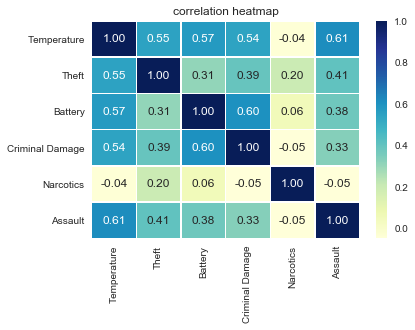

In [86]:
sx = sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu", fmt="0.2f")
sx.set_title("correlation heatmap")
plt.savefig("ccorrelation heatmap.png")
plt.show()

In [75]:
new_five.columns

Index(['Temperature', 'Theft', 'Battery', 'Criminal Damage', 'Narcotics',
       'Assault'],
      dtype='object')

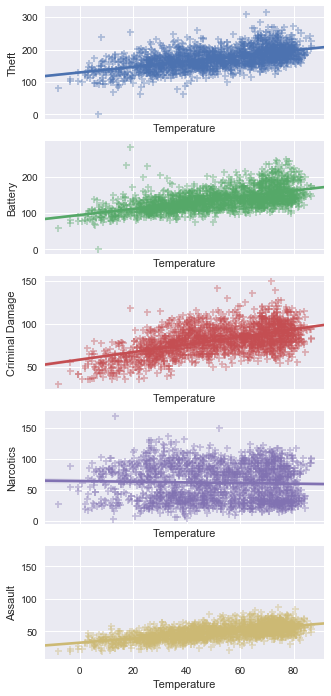

In [78]:
fig, axarr = plt.subplots(5, 1, sharex='all', figsize=(5,12))
for i in np.arange(1, 6):
    sns.regplot(x="Temperature", y=new_five.columns[i], data=new_five, scatter_kws={'alpha':0.4}, marker ="+", ax=axarr[i-1])
plt.savefig("temperature Vs Crime Type.png")
plt.show()


In [79]:
new_five.head()

new_comb = pd.melt(new_five, id_vars=['Temperature'])
new_comb.head()

,Temperature,variable,value
0,18.75,Theft,253.0
1,20.25,Theft,183.0
2,23.75,Theft,144.0
3,24.75,Theft,201.0
4,29.50,Theft,160.0


In [80]:
new_comb.columns = ["Temperature", "CrimeType", "Crime Number"]

In [90]:
from plotnine import *

# R style code

a = (ggplot(new_comb) + aes(x='Temperature', y='Crime Number') + aes(color='CrimeType')+ geom_point(alpha=0.3) +  stat_smooth())

a.save(filename="a.png")


C:\Users\lovel\Anaconda3\lib\site-packages\plotnine\ggplot.py:688: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
C:\Users\lovel\Anaconda3\lib\site-packages\plotnine\ggplot.py:689: UserWarning: Filename: a.png
  warn('Filename: {}'.format(filename))
C:\Users\lovel\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


C:\Users\lovel\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


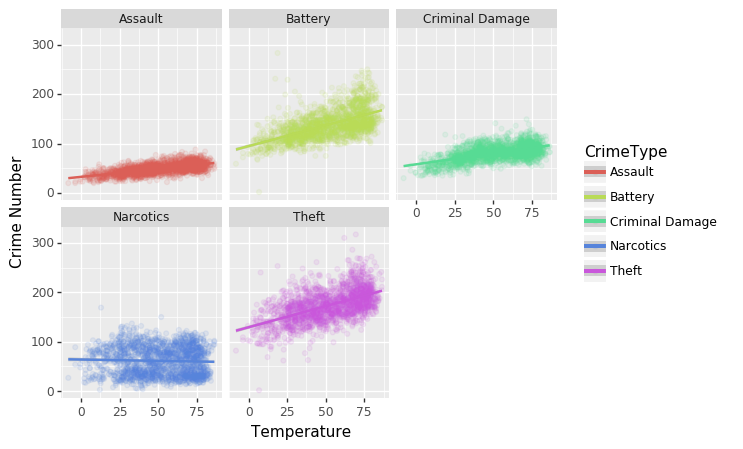

<ggplot: (133181309476)>

In [82]:
(ggplot(new_comb) + aes(x='Temperature', y='Crime Number') + geom_point(alpha=0.1) +  aes(color='CrimeType')+
 stat_smooth() +  facet_wrap("~CrimeType"))
